In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Reshape
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load and preprocess images from directories
def load_images_from_folder(folder_path, image_size=(128, 128)):
    images = []
    labels = []
    class_names = os.listdir(folder_path)
    for label, class_name in enumerate(class_names):
        class_path = os.path.join(folder_path, class_name)
        for filename in os.listdir(class_path):
            img = load_img(os.path.join(class_path, filename), target_size=image_size)
            img_array = img_to_array(img) / 255.0  # Normalize
            images.append(img_array)
            labels.append(label)
    return np.array(images), np.array(labels), class_names

# Path to your dataset folder (structured as folder/class_name/image.jpg)
dataset_path = '/content/drive/MyDrive/Bean_Dataset'

# Load data
X, y, class_names = load_images_from_folder(dataset_path)
print(f"Loaded {X.shape[0]} images with shape {X.shape[1:]}.")

Loaded 990 images with shape (128, 128, 3).


# **CNN MODEL**

In [4]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
num_classes = len(class_names)

# Convert labels to categorical (one-hot encoding)
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

# For DNN, we'll flatten the images
X_train_flatten = X_train.reshape(X_train.shape[0], -1)
X_test_flatten = X_test.reshape(X_test.shape[0], -1)

# CNN Model
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# **DNN MODEL**

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training CNN Model...
Epoch 1/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 287ms/step - accuracy: 0.3689 - loss: 1.6307 - val_accuracy: 0.4528 - val_loss: 1.0755
Epoch 2/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4746 - loss: 1.0591 - val_accuracy: 0.6289 - val_loss: 0.9176
Epoch 3/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.5978 - loss: 0.9169 - val_accuracy: 0.5912 - val_loss: 0.8692
Epoch 4/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.6186 - loss: 0.8145 - val_accuracy: 0.6855 - val_loss: 0.7826
Epoch 5/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.7010 - loss: 0.7014 - val_accuracy: 0.6855 - val_loss: 0.7656
Epoch 6/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.6863 - loss: 0.7316 - val_accuracy: 0.7610 - val_loss: 0.6319
Epoch 7/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.7519 - loss: 0.6121 - val_accuracy: 0.7170 - val_loss: 0.6966
Epoch 8/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.7591 - loss: 0.5906 - 

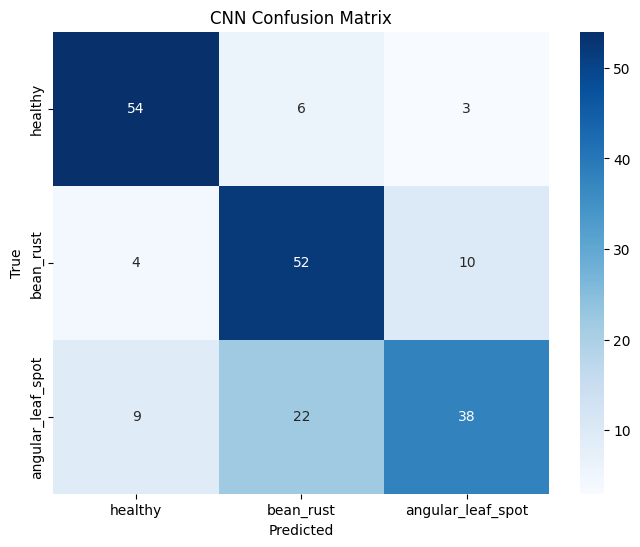


DNN Performance:
Test Accuracy: 61.62%
Test Loss: 0.8071
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step

Classification Report:
                   precision    recall  f1-score   support

          healthy       0.85      0.70      0.77        63
        bean_rust       0.47      0.38      0.42        66
angular_leaf_spot       0.57      0.77      0.65        69

         accuracy                           0.62       198
        macro avg       0.63      0.62      0.61       198
     weighted avg       0.63      0.62      0.61       198



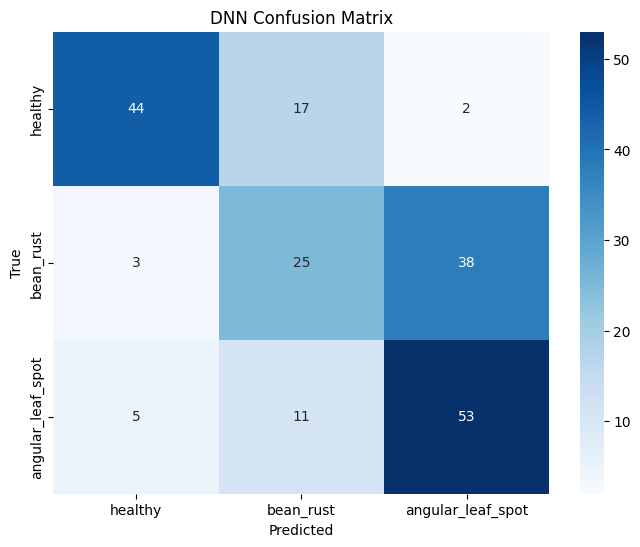

In [5]:
dnn_model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train_flatten.shape[1],)),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
])

dnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train both models
print("Training CNN Model...")
cnn_history = cnn_model.fit(X_train, y_train_cat, epochs=15, validation_split=0.2, batch_size=32, verbose=1)

print("\nTraining DNN Model...")
dnn_history = dnn_model.fit(X_train_flatten, y_train_cat, epochs=15, validation_split=0.2, batch_size=32, verbose=1)

# Evaluation function
def evaluate_model(model, X_test, y_test, model_name, is_cnn=True):
    if not is_cnn:
        X_test = X_test.reshape(X_test.shape[0], -1)

    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"\n{model_name} Performance:")
    print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
    print(f"Test Loss: {test_loss:.4f}")

    y_pred = np.argmax(model.predict(X_test), axis=-1)
    y_true = np.argmax(y_test, axis=-1)

    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=class_names))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    return test_accuracy, test_loss, cm

# Evaluate both models
cnn_acc, cnn_loss, cnn_cm = evaluate_model(cnn_model, X_test, y_test_cat, "CNN")
dnn_acc, dnn_loss, dnn_cm = evaluate_model(dnn_model, X_test, y_test_cat, "DNN", is_cnn=False)

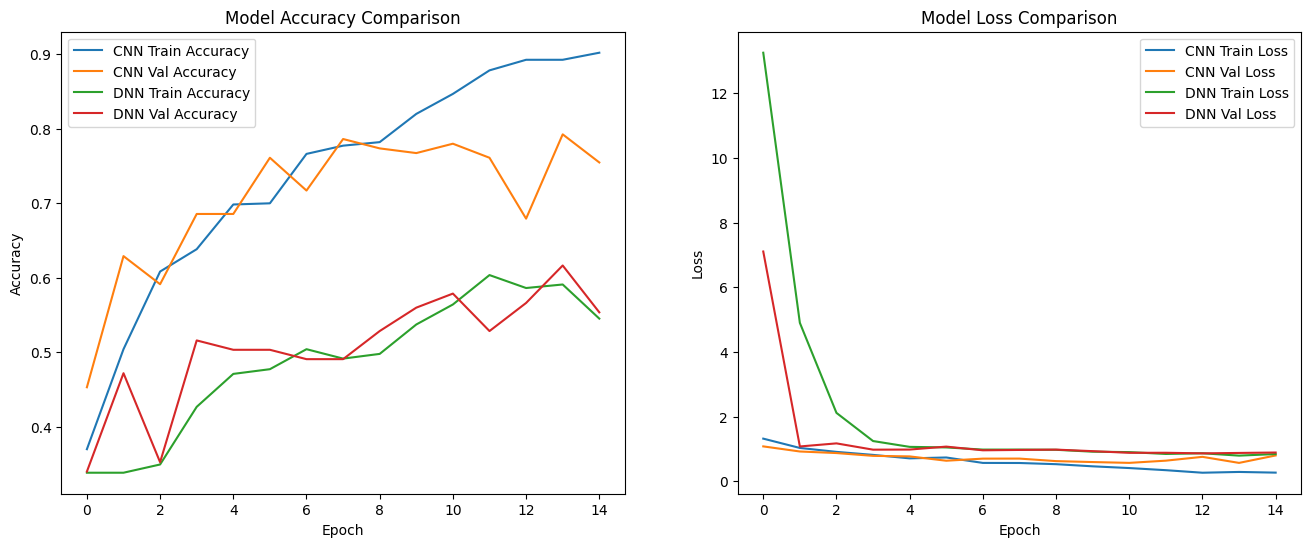


Final Model Comparison:
CNN Test Accuracy: 72.73% | Test Loss: 0.9535
DNN Test Accuracy: 61.62% | Test Loss: 0.8071


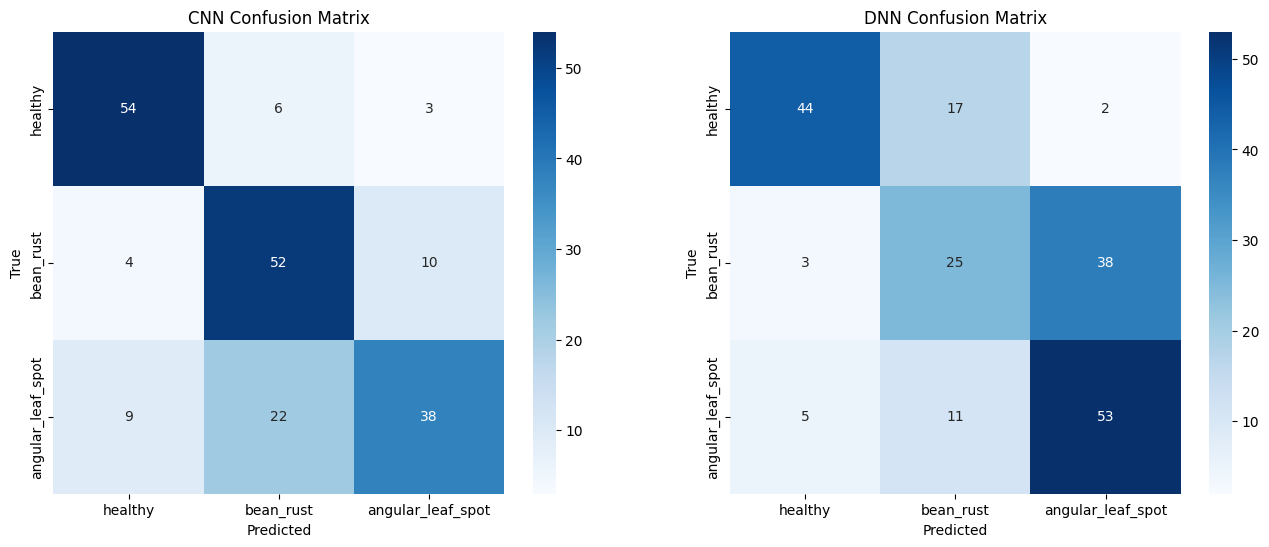

In [6]:
# Plot training history comparison
def plot_comparison(cnn_history, dnn_history):
    plt.figure(figsize=(16, 6))

    # Accuracy comparison
    plt.subplot(1, 2, 1)
    plt.plot(cnn_history.history['accuracy'], label='CNN Train Accuracy')
    plt.plot(cnn_history.history['val_accuracy'], label='CNN Val Accuracy')
    plt.plot(dnn_history.history['accuracy'], label='DNN Train Accuracy')
    plt.plot(dnn_history.history['val_accuracy'], label='DNN Val Accuracy')
    plt.title('Model Accuracy Comparison')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()

    # Loss comparison
    plt.subplot(1, 2, 2)
    plt.plot(cnn_history.history['loss'], label='CNN Train Loss')
    plt.plot(cnn_history.history['val_loss'], label='CNN Val Loss')
    plt.plot(dnn_history.history['loss'], label='DNN Train Loss')
    plt.plot(dnn_history.history['val_loss'], label='DNN Val Loss')
    plt.title('Model Loss Comparison')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()

    plt.show()

plot_comparison(cnn_history, dnn_history)

# Final comparison
print("\nFinal Model Comparison:")
print(f"CNN Test Accuracy: {cnn_acc * 100:.2f}% | Test Loss: {cnn_loss:.4f}")
print(f"DNN Test Accuracy: {dnn_acc * 100:.2f}% | Test Loss: {dnn_loss:.4f}")

# Plot side-by-side confusion matrices
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.heatmap(cnn_cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('CNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(1, 2, 2)
sns.heatmap(dnn_cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('DNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.show()